In [263]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
from scipy import sparse as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

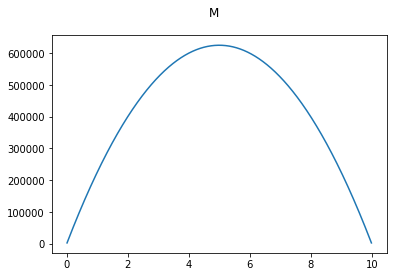

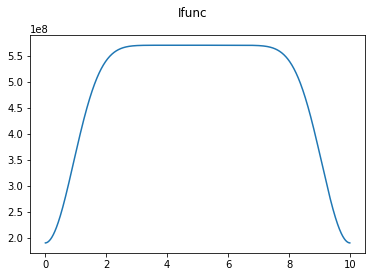

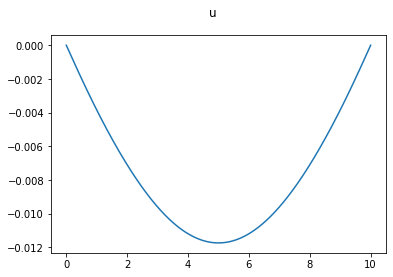

In [107]:
def func(x):
    return -50000

def twopBVP(fvec, alpha, beta, L, N):
    deltaX = L/(N+1)
    fvec[0] = fvec[0]-alpha/(deltaX**2)
    fvec[-1] = fvec[-1] - beta/(deltaX**2)
    
    sub = np.ones(N-1)/(deltaX**2)
    sup = np.ones(N-1)/(deltaX**2)
    mid = -2*np.ones(N)/(deltaX**2)
    A = sp.csc_matrix(sp.diags([sub,sup,mid],[-1,1,0]))
    svar = spsolve(A,fvec)
    return svar

L = 10
N = 999
deltaX = L/(N+1)
x = np.linspace(deltaX,L-deltaX,N)
input1 = []

for i in range(N):
    input1.append(func(x[i]))
input1 = np.array(input1)
E = 1.9e11
M = twopBVP(input1, 0, 0, L, N) 
plt.plot(x,M)
plt.suptitle('M')
plt.show()
input2 = []
Ifunc = []
for i in range(len(M)):
    Ifunc.append((E*(1e-3)*(3-2*np.cos(np.pi*x[i]/L)**12)))
    input2.append(M[i]/(E*(1e-3)*(3-2*np.cos(np.pi*x[i]/L)**12)))
plt.plot(x,Ifunc)
plt.suptitle('Ifunc')
plt.show()
    
x = np.concatenate([[0],x,[L]])    
input2 = np.array(input2)

u = twopBVP(input2, 0, 0, L, N)
u = np.concatenate([[0],u,[0]])

plt.plot(x,u)
plt.suptitle('u')
plt.show()

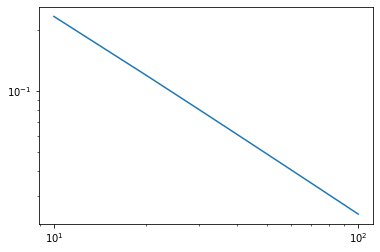

In [270]:
err = []
Ns = []
for i in range(10):
    N = (1+i)*10
    L = 1

    deltaX = L/N
    x = np.linspace(deltaX,L-deltaX,N)
    x = np.concatenate([[0],x,[L]]) 

    sub = np.ones(N-1)/(deltaX**2)
    sup = np.ones(N-1)/(deltaX**2)
    mid = -2*np.ones(N)/(deltaX**2)
    mid[-1] = mid[-1]+1/(deltaX**2)


    k = 1
    A = sp.csc_matrix(sp.diags([sub,sup,mid],[-1,1,0]))
    eigval, eigvec = sp.linalg.eigsh(A,k, which = 'SM')
    solution = []
    for i in range(k):
        solution.append(eigvec.T[k-1-i])
        solution[i] = np.concatenate([[0],solution[i],[eigvec.T[k-1-i][-1]]])

    analsol = []
    for i in range(k):
        analsol.append([])
        for j in range(len(x)):
            analsol[i].append(np.sin(np.pi*(1/2+i)*x[j]))    

    #for i in range(k):
        #plt.plot(x,solution[i],label = f'numerisk lösning för k = {i}')
        #plt.plot(x,analsol[i],label = f'analytisk lösning för k = {i}')
    #plt.legend()
    #plt.show()

    analeig = []
    evalOrd = []
    for i in range(k):
        evalOrd.append(eigval[k-1-i]) 
        analeig.append(-(np.pi*(1/2+i))**2)
    err.append(np.abs(evalOrd[0]-analeig[0]))
    Ns.append(N)
    
Ns = np.array(Ns)
plt.plot(Ns,err)
plt.loglog()
plt.show()

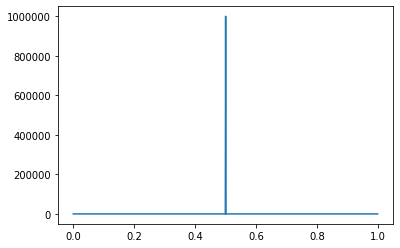

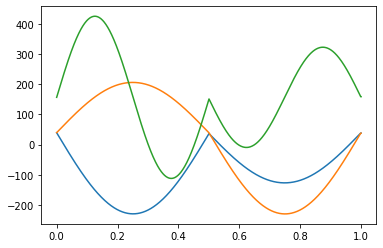

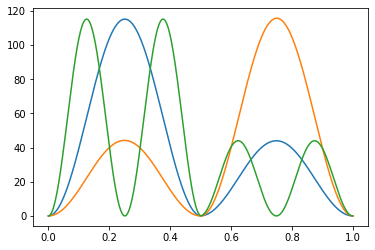

(0, 1, -100, 424.5669093383653)

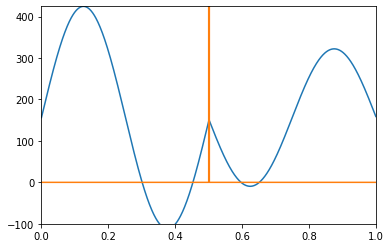

In [364]:
N = 1000
L = 1

deltaX = L/N
x = np.linspace(deltaX,L-deltaX,N)

V = 'dirac'

if(V == 'dubbelbrunn'):
    V = np.zeros(N)
    bredd = len(x)/10
    for n in range(N):
        if(n > 3*bredd and n < 4*bredd):
            V[n] = 1000 
        if(n > 6*bredd and n < 7*bredd):
            V[n] = 1000

if(V == 'dirac'):
    V = np.zeros(N)
    mitt = N/2
    V[int(mitt)] = 1000000

if(V == '3brunn'):
    V = np.zeros(N)
    for n in range(N):
        if(n < N/4):
            V[n] = 1000
        if(N/4 + N/8 n < N)
    

sub = np.ones(N-1)/(deltaX**2)
sup = np.ones(N-1)/(deltaX**2)
mid = -2*np.ones(N)/(deltaX**2)-V


k = 3
A = sp.csc_matrix(sp.diags([sub,sup,mid],[-1,1,0]))
eigval, eigvec = sp.linalg.eigsh(A,k, which = 'SM')
solution = []
probdens = []
for i in range(k):
    solution.append(eigvec.T[k-1-i])
    solution[i] = np.concatenate([[0],solution[i],[eigvec.T[k-1-i][-1]]])
    probdens.append(np.abs(solution[i])**2)
    solution[i] = 5000*solution[i] - eigval[k-1-i]

solution = np.array(solution)
x = np.concatenate([[0],x,[L]])
V = np.concatenate([[0],V,[0]])

plt.plot(x,V)
plt.show()
for i in range(k):
    plt.plot(x,solution[i])
plt.show()

for i in range(k):
    plt.plot(x,40000*probdens[i])
plt.show()

plt.plot(x,solution[-1])
plt.plot(x,V)
plt.axis((0,1,-100,np.amax(solution[-1])))

In [322]:
eigval.shape

(3,)